# Mobile Phone Price Prediction

Algorithms to be used:-

1.   Multiple Linear Regression

3.   Support Vector Regression(SVR)

1.   Decision Tree Regression

1.   Random Forest Regression

1.   XG Boost

1.   CatBoost








### Importing the Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

### Importing the Dataset

In [9]:
dataset = pd.read_csv('Mobile phone price.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y),1)

### Data Preprocessing

### Encoding the Independent Variable

In [10]:
# Create a DataFrame
df = pd.DataFrame(X, columns=['Brand', 'Storage', 'RAM', 'Screen Size', 'BatteryCapacity'])

# Perform one-hot encoding on the 'Brand' column
one_hot_encoded = pd.get_dummies(df['Brand'])

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df.drop('Brand', axis=1), one_hot_encoded], axis=1)

# Print the encoded DataFrame
print(df_encoded)

    Storage RAM Screen Size BatteryCapacity  Apple  Asus  Blackberry  Google  \
0       128   6         6.1            3095      1     0           0       0   
1       256  12         6.8            5000      0     0           0       0   
2       128   8         6.7            4500      0     0           0       0   
3       128   6        6.67            5020      0     0           0       0   
4       128   8         6.4            4614      0     0           0       1   
..      ...  ..         ...             ...    ...   ...         ...     ...   
397     128   8         6.7            4300      0     0           0       0   
398     128   6        6.57            4160      0     0           0       0   
399     128   6         6.7            3687      1     0           0       0   
400     128   8         6.4            4025      0     0           0       0   
401     128   6         6.7            4500      0     0           0       0   

     Huawei  Motorola  Nokia  OnePlus  

### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size = 0.2, random_state = 0)

## Multiple Linear Regression

Training the Multiple Linear Regression model on the Training set

In [12]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(X_train,y_train)

LinearRegression()

Predicting the Test Set Results

In [13]:
y_pred_lr = regressor_lr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_lr.reshape(len(y_pred_lr),1), y_test.reshape(len(y_test),1)),1))

[[ 319.44  269.  ]
 [ 646.76 1049.  ]
 [ 596.94  429.  ]
 [ 540.28  799.  ]
 [ 481.    449.  ]
 [ 669.23  749.  ]
 [ 274.15  299.  ]
 [ 452.84  449.  ]
 [  78.98  169.  ]
 [ 703.86  499.  ]
 [ 517.29  399.  ]
 [ 915.17  999.  ]
 [ 127.92  149.  ]
 [ 104.18  109.  ]
 [ 439.69  329.  ]
 [ 865.3  1099.  ]
 [1052.06 1099.  ]
 [ 128.96  189.  ]
 [ 297.16  279.  ]
 [ 481.    469.  ]
 [ 127.92  139.  ]
 [ 489.33  329.  ]
 [ 174.38  149.  ]
 [ 692.84  329.  ]
 [ 439.69  369.  ]
 [ 739.25  699.  ]
 [ 571.37  309.  ]
 [ 366.7   329.  ]
 [  -8.04  149.  ]
 [ 793.77  599.  ]
 [  26.13  149.  ]
 [ 442.97  329.  ]
 [ 439.69  399.  ]
 [ 342.57  249.  ]
 [ 947.69  969.  ]
 [ 200.14  229.  ]
 [ 127.92  139.  ]
 [ 292.05  299.  ]
 [ 381.29  339.  ]
 [ 641.61  659.  ]
 [ 268.38  249.  ]
 [ 308.61  279.  ]
 [  56.34  169.  ]
 [ 878.51  999.  ]
 [ 983.88 1199.  ]
 [ 481.    449.  ]
 [ 496.54  449.  ]
 [ 481.    459.  ]
 [ 401.14  499.  ]
 [ 427.28  349.  ]
 [ 264.72  199.  ]
 [ 191.65  249.  ]
 [ 739.25  6

Evaluating the Model Performance

In [14]:
r2_score(y_test, y_pred_lr)

0.8248399239708818

## Support Vector Regression(SVR)

Training the Support Vector Regression model on the Training set

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train)
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_train_sc, y_train_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting the Test Set Results

In [25]:
y_pred_svr = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_svr.reshape(len(y_pred_svr),1), y_test.reshape(len(y_test),1)),1))

[[ 240.53  269.  ]
 [ 756.36 1049.  ]
 [ 636.96  429.  ]
 [ 642.59  799.  ]
 [ 477.85  449.  ]
 [ 708.86  749.  ]
 [ 259.44  299.  ]
 [ 391.49  449.  ]
 [ 197.08  169.  ]
 [ 731.57  499.  ]
 [ 521.75  399.  ]
 [ 854.69  999.  ]
 [ 140.    149.  ]
 [ 136.69  109.  ]
 [ 330.88  329.  ]
 [ 970.21 1099.  ]
 [1073.03 1099.  ]
 [ 173.63  189.  ]
 [ 278.1   279.  ]
 [ 477.85  469.  ]
 [ 140.    139.  ]
 [ 523.56  329.  ]
 [ 128.79  149.  ]
 [ 623.18  329.  ]
 [ 330.88  369.  ]
 [ 727.84  699.  ]
 [ 598.99  309.  ]
 [ 345.45  329.  ]
 [ 167.87  149.  ]
 [ 772.58  599.  ]
 [ 163.49  149.  ]
 [ 388.43  329.  ]
 [ 330.88  399.  ]
 [ 290.42  249.  ]
 [ 902.33  969.  ]
 [ 187.62  229.  ]
 [ 140.    139.  ]
 [ 273.6   299.  ]
 [ 292.37  339.  ]
 [ 599.96  659.  ]
 [ 223.57  249.  ]
 [ 236.76  279.  ]
 [ 167.68  169.  ]
 [1120.07  999.  ]
 [1184.62 1199.  ]
 [ 477.85  449.  ]
 [ 475.75  449.  ]
 [ 477.85  459.  ]
 [ 342.87  499.  ]
 [ 372.81  349.  ]
 [ 183.88  199.  ]
 [ 208.22  249.  ]
 [ 727.84  6

Evaluating the Model Performance

In [26]:
r2_score(y_test, y_pred_svr)

0.8724007522232643

## Decision Tree Regression

Training the Decision Tree Regression model on the Training set

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor_dtr = DecisionTreeRegressor(random_state = 0)
regressor_dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

Predicting the Test Set Results

In [16]:
y_pred_dtr = regressor_dtr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_dtr.reshape(len(y_pred_dtr),1), y_test.reshape(len(y_test),1)),1))

[[ 259.    269.  ]
 [ 699.   1049.  ]
 [ 429.    429.  ]
 [ 799.    799.  ]
 [ 542.75  449.  ]
 [1199.    749.  ]
 [ 299.    299.  ]
 [ 542.75  449.  ]
 [ 129.    169.  ]
 [ 699.    499.  ]
 [ 399.    399.  ]
 [ 799.    999.  ]
 [ 141.5   149.  ]
 [  99.    109.  ]
 [ 314.    329.  ]
 [ 699.   1099.  ]
 [1099.   1099.  ]
 [ 199.    189.  ]
 [ 259.    279.  ]
 [ 542.75  469.  ]
 [ 141.5   139.  ]
 [ 749.    329.  ]
 [ 139.    149.  ]
 [ 349.    329.  ]
 [ 314.    369.  ]
 [ 699.    699.  ]
 [ 314.    309.  ]
 [ 374.    329.  ]
 [ 144.    149.  ]
 [ 749.    599.  ]
 [ 149.    149.  ]
 [ 329.    329.  ]
 [ 314.    399.  ]
 [ 290.25  249.  ]
 [ 969.    969.  ]
 [ 179.    229.  ]
 [ 141.5   139.  ]
 [ 265.25  299.  ]
 [ 271.5   339.  ]
 [ 549.    659.  ]
 [ 249.    249.  ]
 [ 289.    279.  ]
 [ 149.    169.  ]
 [1099.    999.  ]
 [1199.   1199.  ]
 [ 542.75  449.  ]
 [ 449.    449.  ]
 [ 542.75  459.  ]
 [ 399.    499.  ]
 [1099.    349.  ]
 [ 175.    199.  ]
 [ 229.    249.  ]
 [ 699.    6

Evaluating the Model Performance

In [17]:
r2_score(y_test, y_pred_dtr)

0.765485413518684

##Random Forest Regression

Training the Random Forest Regression model on the Training set

In [18]:
from sklearn.ensemble import RandomForestRegressor
regressor_rfr = RandomForestRegressor(n_estimators=10,random_state=0)
regressor_rfr.fit(X_train,y_train)

<ipython-input-18-a5742cecf00e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_rfr.fit(X_train,y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

Predicting the Test Set Results

In [19]:
y_pred_rfr = regressor_rfr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_rfr.reshape(len(y_pred_rfr),1), y_test.reshape(len(y_test),1)),1))

[[ 265.93  269.  ]
 [ 584.5  1049.  ]
 [ 435.    429.  ]
 [ 758.    799.  ]
 [ 544.31  449.  ]
 [1199.    749.  ]
 [ 285.47  299.  ]
 [ 546.5   449.  ]
 [ 109.1   169.  ]
 [ 759.    499.  ]
 [ 510.27  399.  ]
 [ 819.    999.  ]
 [ 137.87  149.  ]
 [ 107.    109.  ]
 [ 310.17  329.  ]
 [ 855.67 1099.  ]
 [1049.   1099.  ]
 [ 191.52  189.  ]
 [ 259.2   279.  ]
 [ 544.31  469.  ]
 [ 137.87  139.  ]
 [ 568.    329.  ]
 [ 129.2   149.  ]
 [ 381.    329.  ]
 [ 310.17  369.  ]
 [ 789.    699.  ]
 [ 312.    309.  ]
 [ 375.58  329.  ]
 [ 143.39  149.  ]
 [ 714.    599.  ]
 [ 149.5   149.  ]
 [ 376.61  329.  ]
 [ 310.17  399.  ]
 [ 288.52  249.  ]
 [ 921.    969.  ]
 [ 183.    229.  ]
 [ 137.87  139.  ]
 [ 271.48  299.  ]
 [ 267.6   339.  ]
 [ 582.64  659.  ]
 [ 247.08  249.  ]
 [ 280.67  279.  ]
 [ 159.32  169.  ]
 [1010.    999.  ]
 [1199.   1199.  ]
 [ 544.31  449.  ]
 [ 449.    449.  ]
 [ 544.31  459.  ]
 [ 399.71  499.  ]
 [ 652.46  349.  ]
 [ 176.63  199.  ]
 [ 222.67  249.  ]
 [ 789.    6

Evaluating the Model Performance

In [20]:
r2_score(y_test, y_pred_rfr)

0.8300258999069569

##XGBoost

Training the XGBoost Regression model on the Training set

In [34]:
from xgboost import XGBRegressor
regressor_xb = XGBRegressor()
regressor_xb.fit(X_train_sc, y_train_sc)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Predicting the Test Set Results

In [35]:
y_pred_xb = sc_y.inverse_transform(regressor_xb.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_xb.reshape(len(y_pred_xb),1), y_test.reshape(len(y_test),1)),1))

[[ 259.61  269.  ]
 [ 736.3  1049.  ]
 [ 713.22  429.  ]
 [ 798.59  799.  ]
 [ 542.12  449.  ]
 [1136.87  749.  ]
 [ 293.22  299.  ]
 [ 530.71  449.  ]
 [ 164.71  169.  ]
 [ 808.03  499.  ]
 [ 402.65  399.  ]
 [ 800.99  999.  ]
 [ 144.27  149.  ]
 [ 102.2   109.  ]
 [ 311.02  329.  ]
 [ 742.69 1099.  ]
 [1095.68 1099.  ]
 [ 193.85  189.  ]
 [ 264.94  279.  ]
 [ 542.12  469.  ]
 [ 144.27  139.  ]
 [ 512.05  329.  ]
 [ 135.94  149.  ]
 [ 354.04  329.  ]
 [ 311.02  369.  ]
 [ 699.39  699.  ]
 [ 369.14  309.  ]
 [ 373.8   329.  ]
 [ 144.66  149.  ]
 [ 754.69  599.  ]
 [ 148.89  149.  ]
 [ 335.39  329.  ]
 [ 311.02  399.  ]
 [ 290.26  249.  ]
 [ 961.88  969.  ]
 [ 189.57  229.  ]
 [ 144.27  139.  ]
 [ 265.66  299.  ]
 [ 271.63  339.  ]
 [ 552.18  659.  ]
 [ 212.93  249.  ]
 [ 280.39  279.  ]
 [ 155.19  169.  ]
 [ 964.52  999.  ]
 [1199.45 1199.  ]
 [ 542.12  449.  ]
 [ 448.33  449.  ]
 [ 542.12  459.  ]
 [ 388.19  499.  ]
 [ 478.87  349.  ]
 [ 175.75  199.  ]
 [ 222.51  249.  ]
 [ 699.39  6

Evaluating the Model Performance

In [36]:
r2_score(y_test, y_pred_xb)

0.8658795639073378

## CatBoost

In [27]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.3 MB/s eta 0:00:00


Training the CatBoost Regression model on the Training set

In [28]:
from catboost import CatBoostRegressor
regressor_cb = CatBoostRegressor()
regressor_cb.fit(X_train, y_train)

Learning rate set to 0.034214
0:	learn: 284.1055873	total: 51.1ms	remaining: 51s
1:	learn: 278.5935783	total: 51.7ms	remaining: 25.8s
2:	learn: 273.3744487	total: 52.2ms	remaining: 17.4s
3:	learn: 268.8266114	total: 52.6ms	remaining: 13.1s
4:	learn: 264.2770364	total: 53.1ms	remaining: 10.6s
5:	learn: 260.7089206	total: 54.6ms	remaining: 9.04s
6:	learn: 256.1362090	total: 55.4ms	remaining: 7.86s
7:	learn: 251.5871896	total: 56.2ms	remaining: 6.97s
8:	learn: 247.4928918	total: 57.3ms	remaining: 6.31s
9:	learn: 243.5232260	total: 58.3ms	remaining: 5.77s
10:	learn: 239.2959325	total: 59.2ms	remaining: 5.33s
11:	learn: 235.4198282	total: 60.1ms	remaining: 4.95s
12:	learn: 231.4558334	total: 61.2ms	remaining: 4.65s
13:	learn: 227.5443991	total: 62.3ms	remaining: 4.38s
14:	learn: 223.7470204	total: 63.3ms	remaining: 4.16s
15:	learn: 219.9096768	total: 64.4ms	remaining: 3.96s
16:	learn: 217.2887974	total: 65.1ms	remaining: 3.77s
17:	learn: 214.1675301	total: 65.7ms	remaining: 3.58s
18:	learn:

Predicting the Test Set Results

In [29]:
y_pred_cb = regressor_cb.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_cb.reshape(len(y_pred_cb),1), y_test.reshape(len(y_test),1)),1))

[[ 237.6   269.  ]
 [ 704.06 1049.  ]
 [ 570.48  429.  ]
 [ 783.7   799.  ]
 [ 532.01  449.  ]
 [1012.26  749.  ]
 [ 265.79  299.  ]
 [ 514.55  449.  ]
 [ 152.27  169.  ]
 [ 725.95  499.  ]
 [ 479.03  399.  ]
 [ 841.85  999.  ]
 [ 161.48  149.  ]
 [ 138.62  109.  ]
 [ 322.89  329.  ]
 [ 788.65 1099.  ]
 [1063.68 1099.  ]
 [ 184.91  189.  ]
 [ 271.57  279.  ]
 [ 532.01  469.  ]
 [ 161.48  139.  ]
 [ 483.85  329.  ]
 [ 133.91  149.  ]
 [ 382.88  329.  ]
 [ 322.89  369.  ]
 [ 715.93  699.  ]
 [ 409.93  309.  ]
 [ 366.01  329.  ]
 [ 137.72  149.  ]
 [ 766.84  599.  ]
 [ 147.97  149.  ]
 [ 366.36  329.  ]
 [ 322.89  399.  ]
 [ 289.83  249.  ]
 [ 923.15  969.  ]
 [ 190.69  229.  ]
 [ 161.48  139.  ]
 [ 267.06  299.  ]
 [ 279.05  339.  ]
 [ 574.34  659.  ]
 [ 237.79  249.  ]
 [ 244.15  279.  ]
 [ 163.13  169.  ]
 [1089.08  999.  ]
 [1204.21 1199.  ]
 [ 532.01  449.  ]
 [ 437.29  449.  ]
 [ 532.01  459.  ]
 [ 381.68  499.  ]
 [ 458.48  349.  ]
 [ 182.55  199.  ]
 [ 215.75  249.  ]
 [ 715.93  6

Evaluating the Model Performance

In [30]:
r2_score(y_test, y_pred_cb)

0.8878245092938506

# Selection of the best Model

For comparison of our different models, we will use r2 Score
as our parameter:-


1.   Multiple Linear Regression - 0.824
1.   Support Vector Regression - 0.872
1.   Decision Tree Regression - 0.765
2.   Random Forest Regression - 0.830
5.   XGBoost - 0.865
5.   CatBoost - 0.887



So, clearly **CatBoost** is our best model with an amazing r2 score of 0.887.

## BONUS TASK - Exploratory Data Analysis(EDA)

In [38]:
display(dataset)

,Model,Brand,Storage(GB),RAM(GB),Screen Size (inches),Battery Capacity (mAh),Price (in dollars)
0,iPhone 13 Pro,Apple,128,6,6.10,3095,999.0
1,Galaxy S21 Ultra,Samsung,256,12,6.80,5000,1199.0
2,9 Pro,OnePlus,128,8,6.70,4500,899.0
3,Redmi Note 10 Pro,Xiaomi,128,6,6.67,5020,279.0
4,Pixel 6,Google,128,8,6.40,4614,799.0
...,...,...,...,...,...,...,...
397,Galaxy Note20 5G,Samsung,128,8,6.70,4300,1049.0
398,Mi 10 Lite 5G,Xiaomi,128,6,6.57,4160,349.0
399,iPhone 12 Pro Max,Apple,128,6,6.70,3687,1099.0
400,Reno3,Oppo,128,8,6.40,4025,429.0


###Plotting Bar Graph between Price and Brand

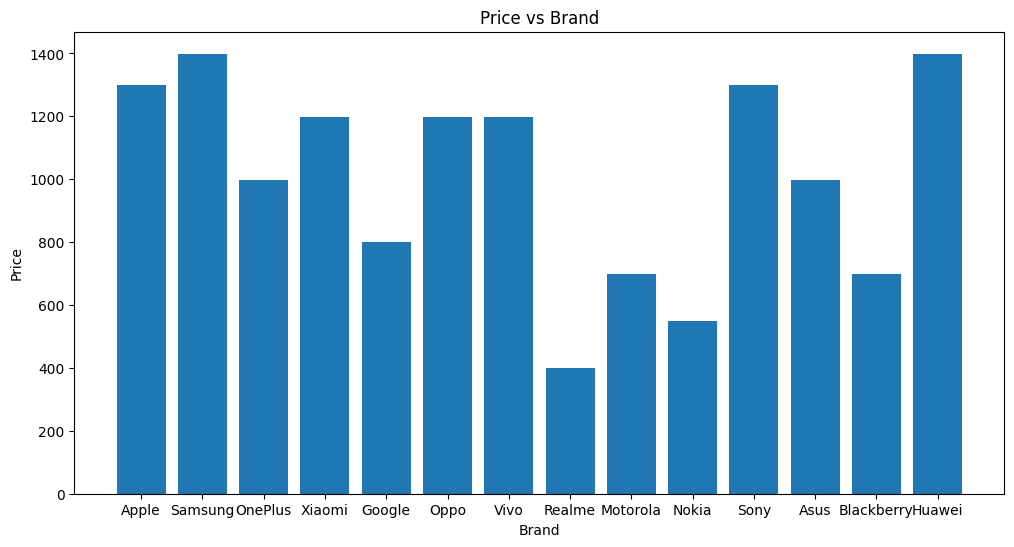

In [44]:
price = dataset['Price (in dollars)']
brand = dataset['Brand']
plt.figure(figsize=(12, 6))
plt.bar(brand,price)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Price vs Brand')
plt.show()

###Plotting Bar Graph between Price and Storage

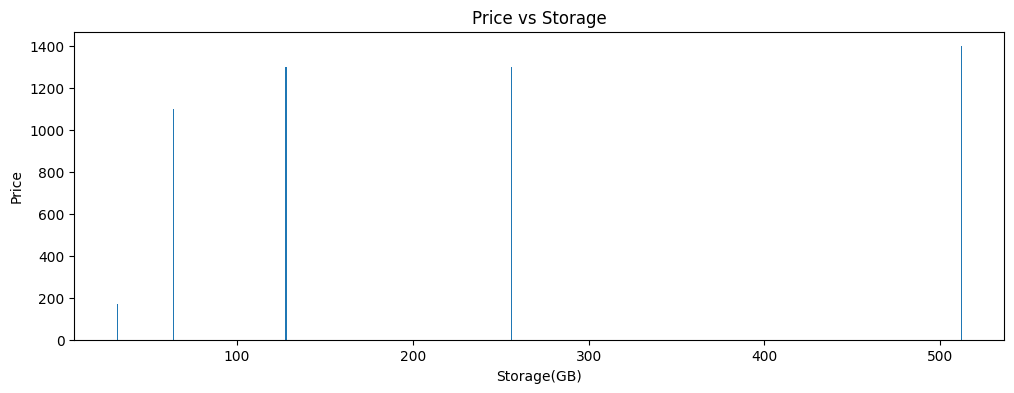

In [56]:
price = dataset['Price (in dollars)']
storage = dataset['Storage(GB)']
plt.figure(figsize=(12, 4))
plt.bar(storage,price)
plt.xlabel('Storage(GB)')
plt.ylabel('Price')
plt.title('Price vs Storage')
plt.show()

###Plotting Bar Graph between Price and RAM

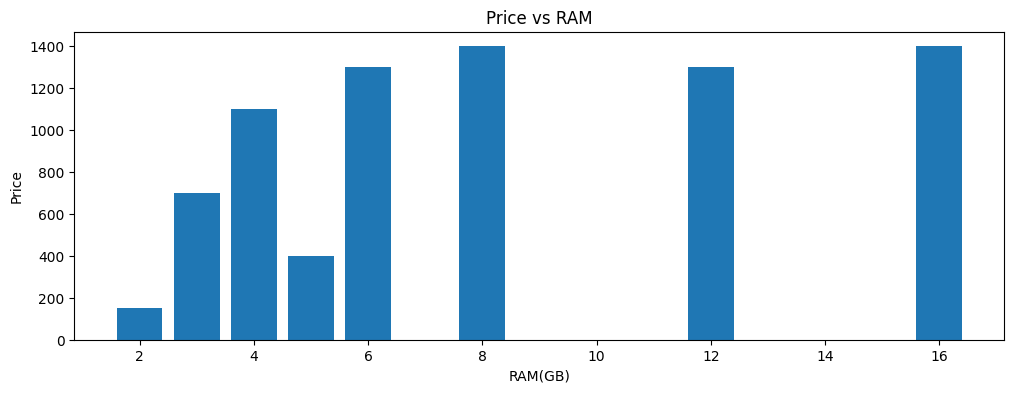

In [53]:
price = dataset['Price (in dollars)']
ram = dataset['RAM(GB)']
plt.figure(figsize=(12, 4))
plt.bar(ram,price)
plt.xlabel('RAM(GB)')
plt.ylabel('Price')
plt.title('Price vs RAM')
plt.show()

###Plotting Bar Graph between Price and Screen Size

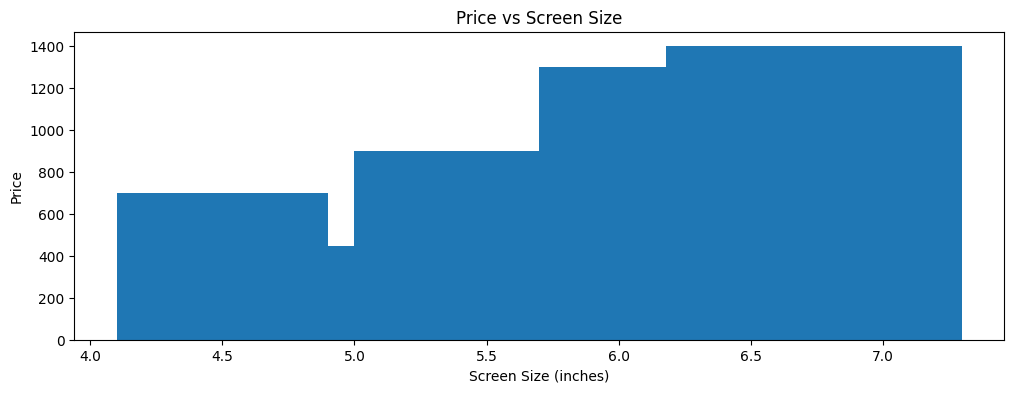

In [52]:
price = dataset['Price (in dollars)']
screen_size = dataset['Screen Size (inches)']
plt.figure(figsize=(12, 4))
plt.bar(screen_size,price)
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price')
plt.title('Price vs Screen Size')
plt.show()

###Plotting Bar Graph between Price and Battery Capacity

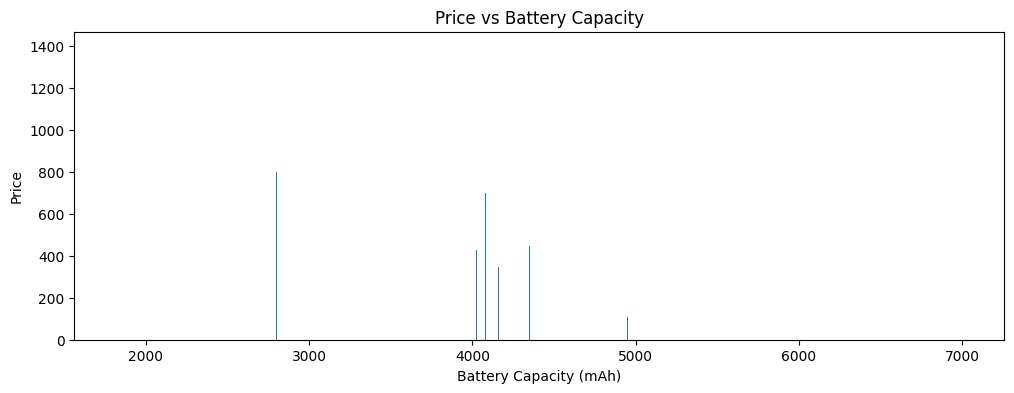

In [54]:
price = dataset['Price (in dollars)']
battery = dataset['Battery Capacity (mAh)']
plt.figure(figsize=(12, 4))
plt.bar(battery,price)
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Price')
plt.title('Price vs Battery Capacity')
plt.show()

###Plotting Histogram between No. of Mobiles and Price



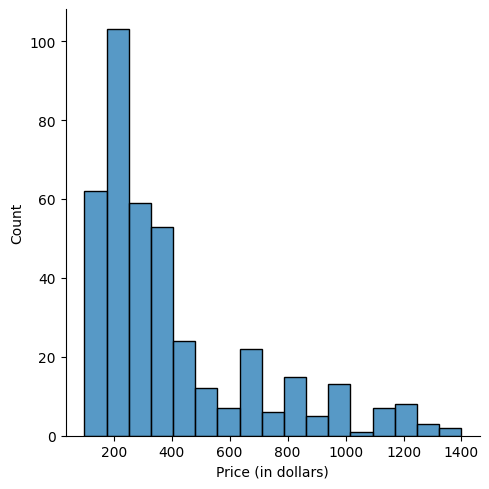

In [55]:
import seaborn
seaborn.displot(dataset['Price (in dollars)'])

## Conclusions :-

* The price of mobile phones depends very much on their
  brand,we can observe that mobiles of Huawei, Apple and Samsung are much costlier than Realme,Motorola.

* More the Storage, more costlier the mobile phone is.

* More the RAM, more costlier the mobile phone is but 8GB
  RAM mobiles are costlier than 12GB RAM, may be due to the reason that 12GB RAM is not commonly offered by the premium brands.

* Nothing clear conclusion can be made w.r.t Battery
  Capacity.

* Cheaper mobile phones are clearly in more in number as
  most people want a affordable mobile phone for the day-to-day use.